# Exploratory Data Analysis (EDA) of Movie Dataset

### Overview
This notebook performs an in-depth exploratory data analysis (EDA) on a dataset of movies. The goal is to understand the structure of the data, identify patterns, and uncover insights that can guide further analysis or decision-making.


### Tools Used:
- **Python Libraries**: `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly`, `textblob`,  `missingno`, `nltk`.
- **Techniques**: Data wrangling, correlation analysis, distribution analysis, text analysis, and visualization.
  


---

## 1. Data preparation

### Importing libraries and loading data
We begin by importing the necessary libraries: `pandas` for data manipulation, `json` for loading the dataset, and `matplotlib` and `seaborn` for visualization. The dataset is loaded from a JSON file (`cleaned_data.json`) using the `json` module.

### Converting JSON to DataFrame
The JSON data is structured as a list of dictionaries, where each dictionary represents a movie. We extract the movie details, including the title and URL, and store them in a list. This list is then converted into a pandas DataFrame for easier analysis.

### Translating column names
The dataset contains column names in Russian. To make the data more accessible, we create a dictionary to map the Russian column names to their English equivalents. The `rename` method is then used to update the column names in the DataFrame.

In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Uploading a JSON file
with open('../data/cleaned_data.json', 'r', encoding='utf-8') as file:
    data = json.load(file)

# Converting data to a DataFrame
movies_list = []
for movie in data:
    movie_details = {'title': movie['title']}
    movie_details.update(movie['details']) 
    movie_details['url'] = movie['url']
    movies_list.append(movie_details)

movies_df = pd.DataFrame(movies_list)

# Dictionary for translating columns
column_translation = {
    'Аудиодорожки': 'Audio Tracks',
    'Субтитры': 'Subtitles (Russian)',
    'Качество': 'Quality',
    'Год производства': 'Year',
    'Страна': 'Country',
    'Жанр': 'Genre',
    'Слоган': 'Slogan',
    'Режиссер': 'Director',
    'Сценарий': 'Screenplay',
    'Продюсер': 'Producer',
    'Оператор': 'Cinematographer',
    'Композитор': 'Composer',
    'Художник': 'Art Director',
    'Монтаж': 'Editor',
    'Бюджет $': 'Budget',
    'Сборы в США $': 'US Gross',
    'Сборы в мире $': 'Worldwide Gross',
    'Зрители': 'Audience',
    'Сборы в России $': 'Russia Gross',
    'Премьера в России': 'Russia Premiere',
    'Премьера в мире': 'World Premiere',
    'Релиз на DVD': 'DVD Release',
    'Релиз на Blu-ray': 'Blu-ray Release',
    'Возраст': 'Age Rating',
    'Рейтинг MPAA': 'MPAA Rating',
    'Время в минутах': 'Runtime (min)',
    'Рейтинг': 'Rating',
    'Топ 250': 'Top 250',
    'Количество оценок': 'Votes Count',
    'Актеры': 'Actors',
    'Количество рецензий от зрителей': 'User Reviews Count',
    'Количество положительных рецензий от зрителей': 'Positive User Reviews',
    'Количество отрицательных рецензий от зрителей': 'Negative User Reviews',
    'Количество нейтральных рецензий от зрителей': 'Neutral User Reviews',
    'Процент положительных рецензий международных критиков': 'International Critics Positive %',
    'Процент положительных рецензий российских критиков': 'Russian Critics Positive %',
    'Рецензии 100 зрителей': 'User Reviews'
}

# Renaming columns
movies_df.rename(columns=column_translation, inplace=True)

Just show the top 10 rows from our table of movies:

In [6]:
movies_df.head()

,title,Audio Tracks,Subtitles (Russian),Quality,Year,Country,Genre,Slogan,Director,Screenplay,...,International Critics Positive %,Russian Critics Positive %,User Reviews,url,Ре-релиз (РФ),Маркетинг,4K доступно только на больших экранах,Цифровой релиз,Директор фильма,Платформа
0,1+1,Русский · ПИФАГОР (стерео),Русские,5.1,2011,Франция,"драма, комедия",«Sometimes you have to reach into someone else...,"Оливье Накаш, Эрик Толедано","Оливье Накаш, Эрик Толедано, Филипп Поццо ди Б...",...,76%,100%,"[v_wolery, Им вместе было хорошо, Французский ...",https://www.kinopoisk.ru/film/535341/,NaN,NaN,NaN,NaN,NaN,NaN
1,Интерстеллар,NaN,NaN,NaN,2014,"США, Великобритания, Канада","фантастика, драма, приключения",«Следующий шаг человечества станет величайшим»,Кристофер Нолан,"Джонатан Нолан, Кристофер Нолан",...,73%,81%,"[dmitry.zilarra, Космическая одиссея Нолана, К...",https://www.kinopoisk.ru/film/258687/,26.08.2021,NaN,NaN,NaN,NaN,NaN
2,Побег из Шоушенка,NaN,NaN,NaN,1994,США,драма,«Страх - это кандалы. Надежда - это свобода»,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг",...,89%,—,"[HochuHollywood, Главным героем всё это время ...",https://www.kinopoisk.ru/film/326/,NaN,NaN,NaN,NaN,NaN,NaN
3,Остров проклятых,Русский · ПИФАГОР (стерео),Русские,5.1,2009,США,"триллер, детектив, драма",«Some places never let you go»,Мартин Скорсезе,"Лаэта Калогридис, Деннис Лихейн",...,69%,86%,"[Notontis, Принцесса и людоед, Ранее я написал...",https://www.kinopoisk.ru/film/397667/,14.08.2021,NaN,NaN,NaN,NaN,NaN
4,Зеленая миля,NaN,NaN,NaN,1999,США,"драма, фэнтези, криминал",«Пол Эджкомб не верил в чудеса. Пока не столкн...,Фрэнк Дарабонт,"Фрэнк Дарабонт, Стивен Кинг",...,79%,—,"[Wikia, Кино-легенды. Часть 10. Последняя миля...",https://www.kinopoisk.ru/film/435/,NaN,30000000,NaN,NaN,NaN,NaN


## 1.1 Data cleaning and overview

### Converting columns to numeric
Some columns in the dataset, such as `Budget`, `US Gross`, `Worldwide Gross`, `Russia Gross`, `Rating`, `Audience`, and `Runtime (min)`, contain numeric data but are stored as strings or other types. We use `pd.to_numeric` to convert these columns to numeric types. The `errors='coerce'` parameter ensures that any non-numeric values are converted to `NaN` (Not a Number) to avoid errors.

### General data overview
To understand the structure and content of the dataset, we use the `info()` method to display the data types and non-null counts for each column. Additionally, the `describe()` method provides summary statistics (e.g., mean, standard deviation, min, max) for the numeric columns, giving us a quick snapshot of the dataset's distribution.

### Summary
- Numeric columns are converted to the appropriate data type for analysis.
- A general overview of the dataset is provided, including data types and summary statistics.

In [6]:
numeric_columns = ['Budget', 'US Gross', 'Worldwide Gross', 'Russia Gross', 'Rating', 'Audience', 'Runtime (min)']
for column in numeric_columns:
    movies_df[column] = pd.to_numeric(movies_df[column], errors='coerce')

# General data overview
print("Data Information:")
print(movies_df.info())
print("\nDescriptive statistics:")
print(movies_df.describe())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   title                                  250 non-null    object 
 1   Audio Tracks                           133 non-null    object 
 2   Subtitles (Russian)                    133 non-null    object 
 3   Quality                                85 non-null     object 
 4   Year                                   250 non-null    object 
 5   Country                                250 non-null    object 
 6   Genre                                  250 non-null    object 
 7   Slogan                                 250 non-null    object 
 8   Director                               250 non-null    object 
 9   Screenplay                             250 non-null    object 
 10  Producer                               215 non-null    o

### Missing data overview

We use `missingno` library, which is a Python library designed to visualize and analyze missing data in datasets. The `msno.matrix()` function creates a matrix plot that helps identify missing values.

In [7]:
!pip install missingno

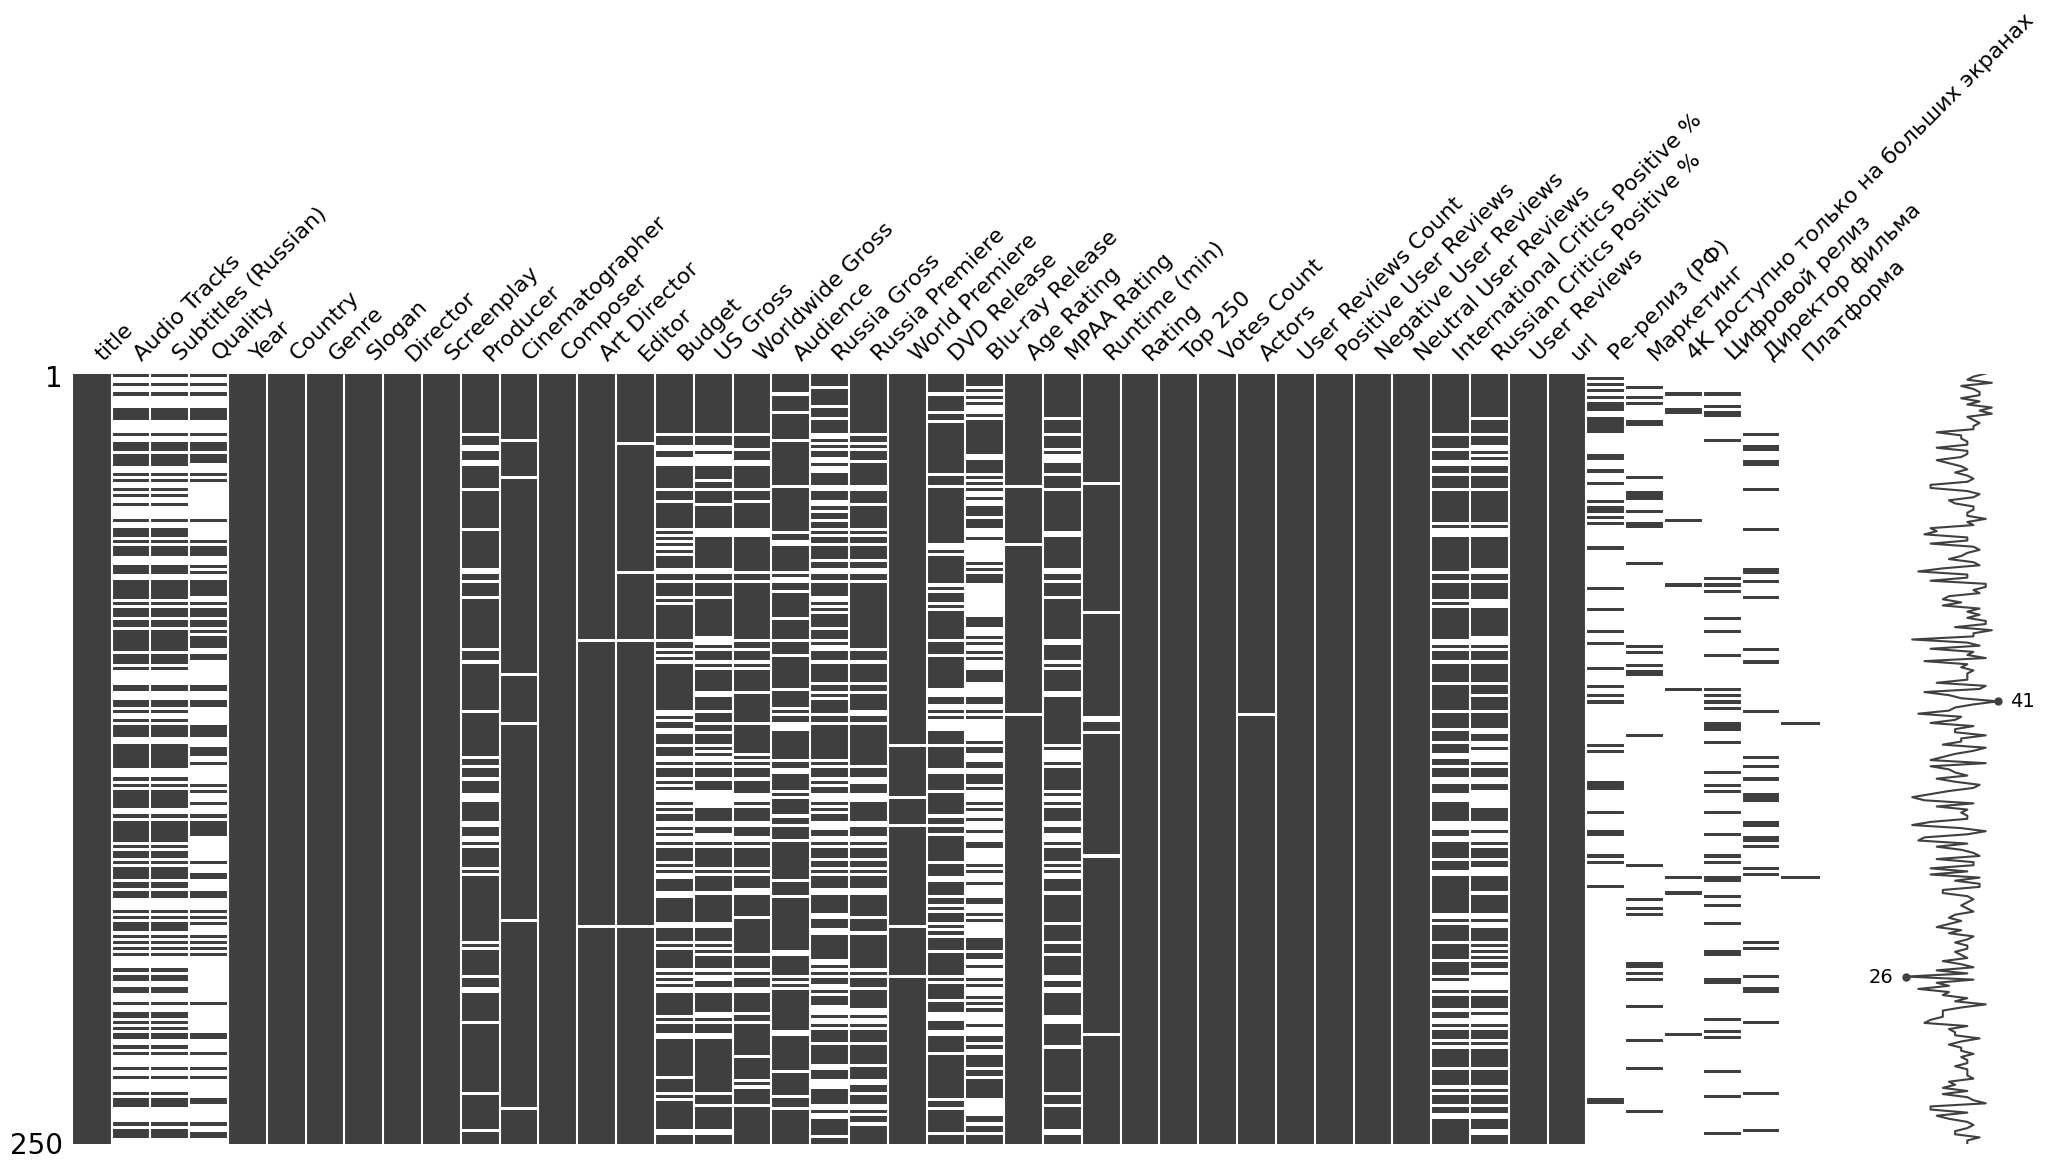

In [8]:
import missingno as msno
msno.matrix(movies_df)
plt.show()

## 2. Distribution of budget and worldwide gross (Log scale)

### Budget distribution
We create a histogram to visualize the distribution of movie budgets using a logarithmic scale. Key features of the plot:
- **X-axis**: Budget in dollars (log scale).
- **Y-axis**: Number of movies.
- A kernel density estimate (KDE) is overlaid to show the smoothed distribution.

### Worldwide gross distribution
Another histogram is created to visualize the distribution of worldwide gross revenue using a logarithmic scale. Key features of the plot:
- **X-axis**: Worldwide gross revenue in dollars (log scale).
- **Y-axis**: Number of movies.
- A kernel density estimate (KDE) is overlaid to show the smoothed distribution.

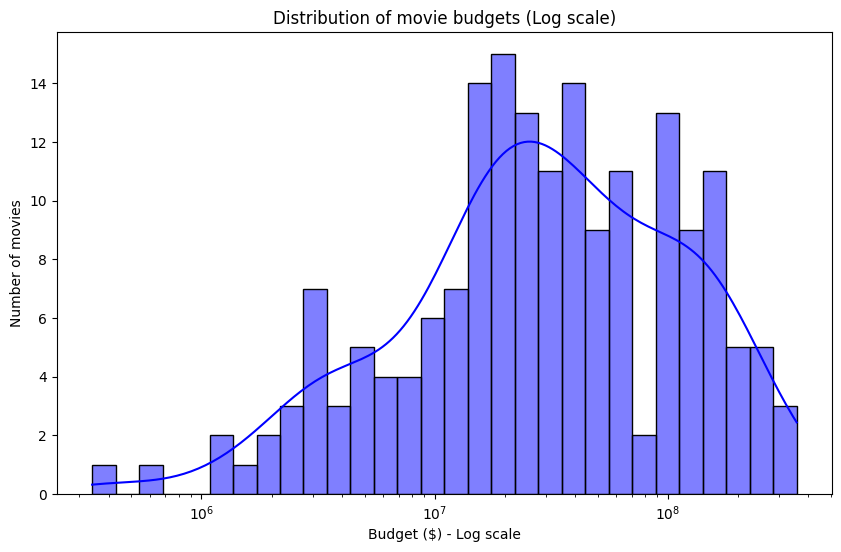

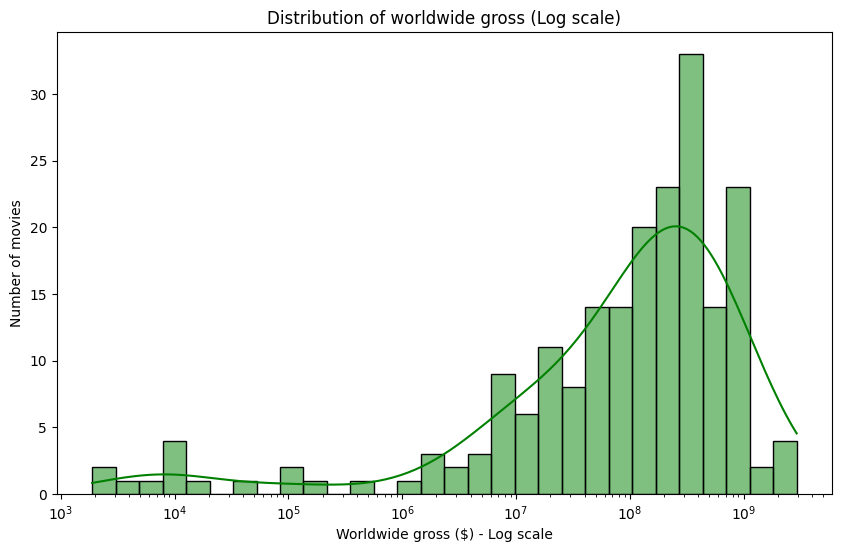

In [9]:
# Distribution of budget and fees with logarithmic scale
plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Budget'], bins=30, kde=True, color='blue', log_scale=True)
plt.title('Distribution of movie budgets (Log scale)')
plt.xlabel('Budget ($) - Log scale')
plt.ylabel('Number of movies')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(movies_df['Worldwide Gross'], bins=30, kde=True, color='green', log_scale=True)
plt.title('Distribution of worldwide gross (Log scale)')
plt.xlabel('Worldwide gross ($) - Log scale')
plt.ylabel('Number of movies')
plt.show()

#### Insights:
- The distribution shows how budgets are spread across different ranges, highlighting common budget ranges and outliers.
- Here we see that outliers exist for budget and global gross features, which have significantly less value than the mean, but, In general, the majority of values for these features follow a normal distribution, especially the worldwide gross.
  
**Why logarithmic scale?**

The logarithmic scale is useful for data with a large range of values, such as from thousands to billions. It "compresses" the range, allowing us to better visualize the distribution of the data.

---

## 3. Budget vs Worldwide gross analysis

### Calculating profit
To analyze the financial success of the movies, we calculate the `Profit` for each film by subtracting the `Budget` from the `Worldwide Gross`. This gives us a clear metric to evaluate how much money each movie made globally after accounting for its production costs.

### Visualizing Budget vs Worldwide gross
We create a scatter plot to visualize the relationship between a movie's budget and its worldwide gross revenue. The plot uses:
- **X-axis**: Budget (in dollars).
- **Y-axis**: Worldwide Gross (in dollars).
- **Color**: Differentiates between profitable movies (`Profit > 0`) and non-profitable movies (`Profit <= 0`).

Red dashed lines are added at `Budget = 0` and `Worldwide Gross = 0` to highlight the break-even points.

### Notes:
- The plot helps identify trends, such as whether higher budgets generally lead to higher worldwide gross revenue.
- It also shows how many movies are profitable versus non-profitable.

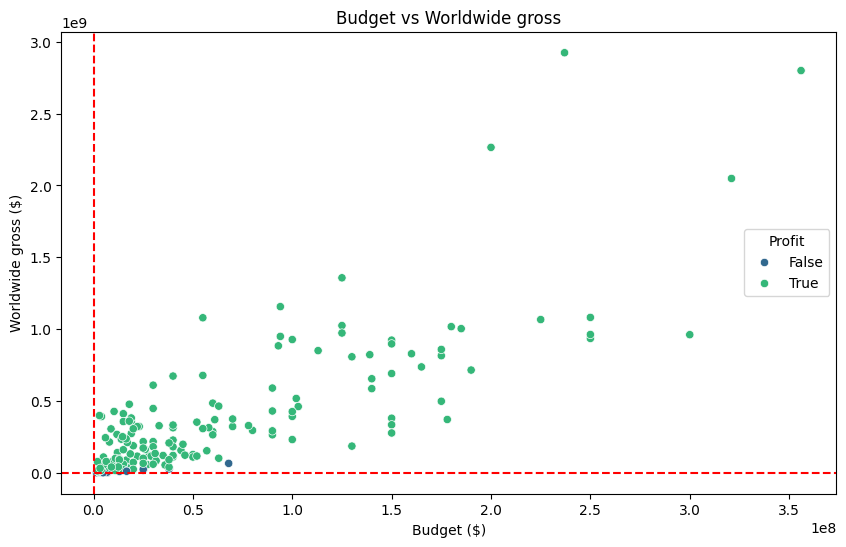

In [10]:
## Budget-fee ratio
movies_df['Profit'] = movies_df['Worldwide Gross'] - movies_df['Budget']

plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_df['Budget'], y=movies_df['Worldwide Gross'], hue=movies_df['Profit'] > 0, palette='viridis')
plt.title('Budget vs Worldwide gross')
plt.xlabel('Budget ($)')
plt.ylabel('Worldwide gross ($)')
plt.axhline(0, color='red', linestyle='--')
plt.axvline(0, color='red', linestyle='--')
plt.show()

### Insights from the plot
The scatter plot visualizes the relationship between a movie's budget and its worldwide gross revenue, with points colored based on profitability (`Profit > 0` or `Profit <= 0`). Here are the key observations:

1. **Positive correlation**:
   - There is a clear positive trend (for high-rating films, obviously): as the budget increases, the worldwide gross revenue tends to increase as well. This suggests that higher-budget films generally generate higher revenue.

2. **Profitability**:
   - Most movies with higher budgets (above a certain threshold) are profitable (`Profit > 0`), as indicated by the green points.
   - Some lower-budget movies also achieve profitability, but they tend to have lower worldwide gross revenue.

3. **Outliers**:
   - A few high-budget movies have relatively low worldwide gross revenue, indicating that not all high-budget films guarantee success.
   - Conversely, some low-budget movies achieve surprisingly high revenue, suggesting that factors other than budget (e.g., story, marketing, audience reception) play a significant role.

4. **Profitable versus Non-profitable films**:
    - There are a small number of unprofitable films, which can be explained by the fact that all films considered -all in the 'top-250' list (this suggestion will be proved or rejected in the next stages). We can also highlight that all unprofitable films have relatively low budgets.

---

## 4. Analysis of categorical data

### Most popular genres
We analyze the distribution of movie genres to identify the most popular ones. The `Genre` column contains multiple genres per movie, separated by commas. We split these genres into individual entries and count their frequency.

#### Visualization:
- A bar chart is created to display the number of movies per genre.
- **X-axis**: Genre.
- **Y-axis**: Number of movies.

### Top 10 directors by number of films
We identify the top 10 directors based on the number of movies they have directed. This helps highlight the most prolific directors in the dataset.

#### Visualization:
- A bar chart is created to display the number of movies directed by each of the top 10 directors.
- **X-axis**: Director names.
- **Y-axis**: Number of movies.

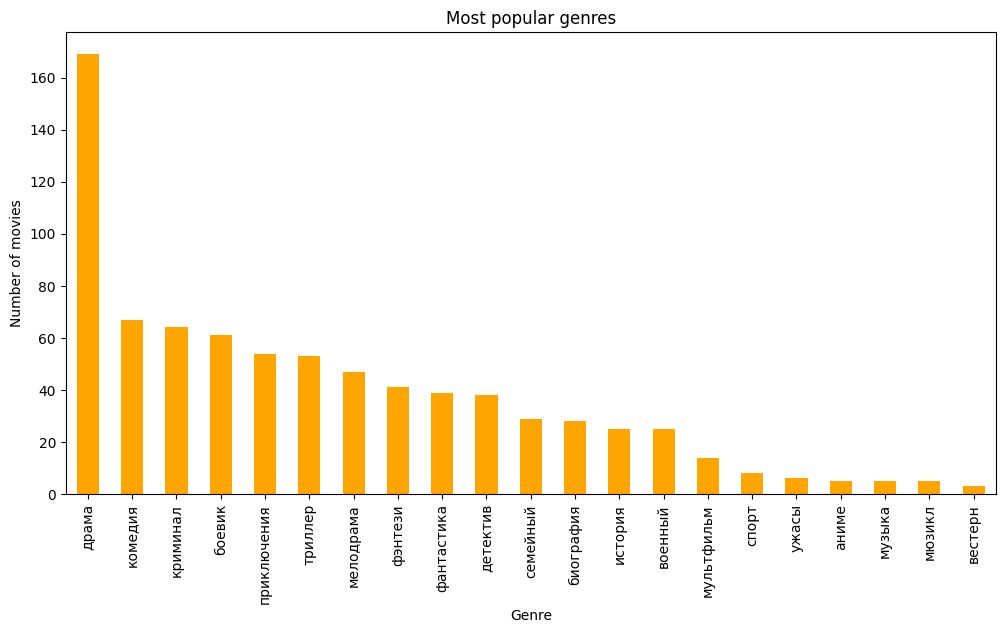

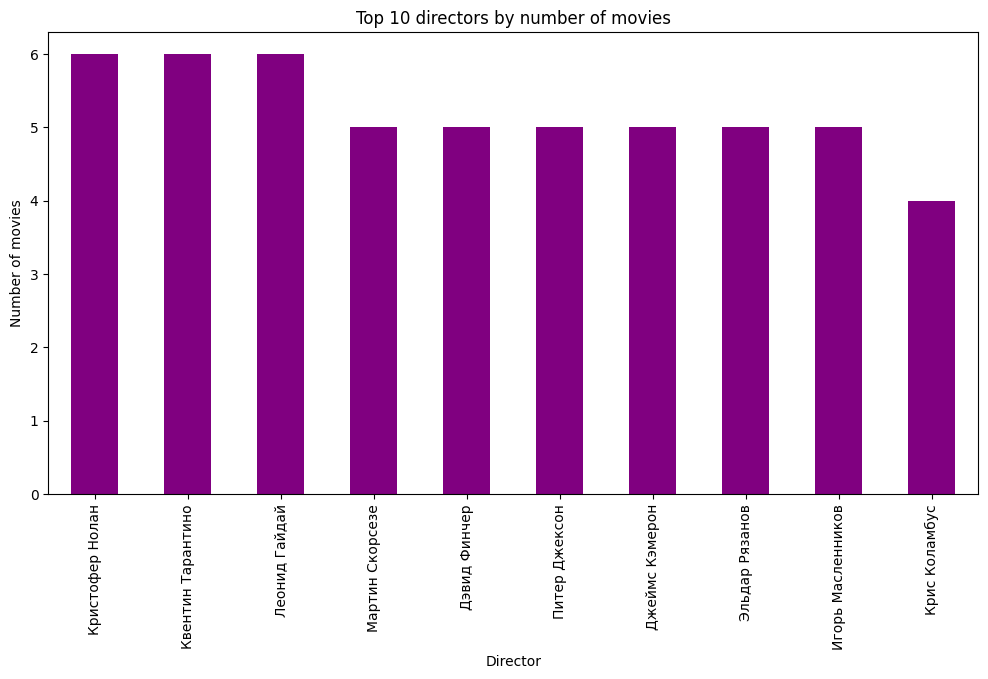

In [11]:
# Analysis of categorical data
## Most popular genres
genres = movies_df['Genre'].str.split(', ', expand=True).stack()
genre_counts = genres.value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='orange')
plt.title('Most popular genres')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.show()

## Top 10 directors by number of films
top_directors = movies_df['Director'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_directors.plot(kind='bar', color='purple')
plt.title('Top 10 directors by number of movies')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.show()

### Insights:
#### For genre distribution:
- The most common genres: "drama", "comedy", "crime" - dominate the dataset - especially the "drama" (`драма`) genre. It shows us audience preferences for not only high-rated film genres, but also film genres in general (patterns).
- Some niche genres appear less frequently, reflecting their specialized appeal.

#### For directors distribution:
- This data allow us determine the most successfull directors - the list of them (`top_directors`) can be used for the future analytical work.

---

## 5. Distribution of movies by year

This visualization will help us to determine the distribution of films with high ratings over time.

### Preparing the data
The `Year` column is converted to a numeric type to ensure proper analysis. Any non-numeric values are coerced to `NaN` to avoid errors.

### Visualization
We create a bar chart to visualize the distribution of movies by their release year. Key features of the plot:
- **X-axis**: Release year.
- **Y-axis**: Number of movies released in that year.
- The bars are colored in teal for better visual appeal.

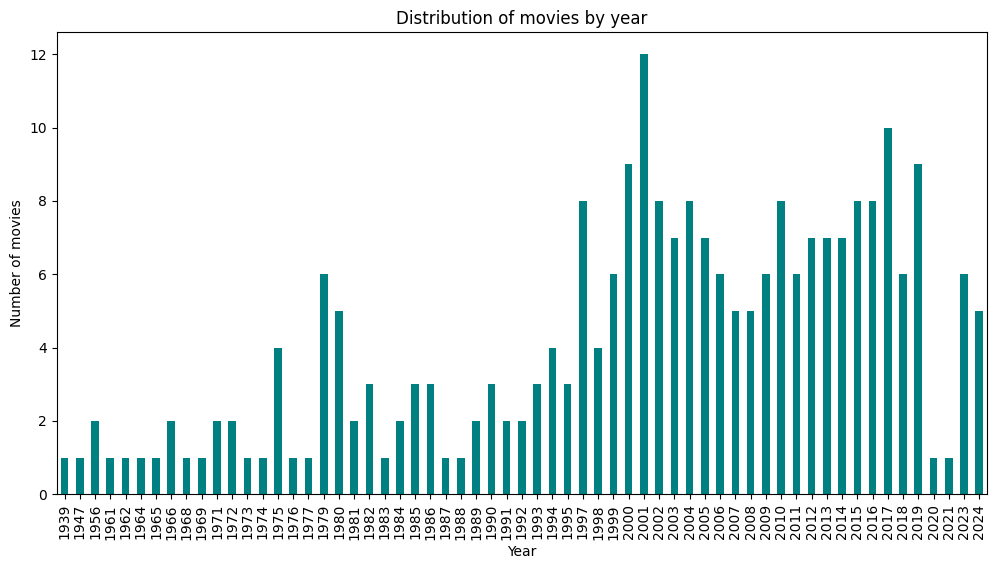

In [12]:
movies_df['Year'] = pd.to_numeric(movies_df['Year'], errors='coerce')

plt.figure(figsize=(12, 6))
movies_df['Year'].value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Distribution of movies by year')
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.show()

### Insights:

#### Here we can find some patterns of films distribution:
  - Number of high-rating films was rising actively from end of 20-th century, and peak for these films is the beginning of 21-st century - this may be related to technical progress in general and in cinematography also, or rising interest to films in these years, or it can be caused by the appearance of films that changed the approach to creating movies or became **"cult"** (for example, according to the editorial board of Kinopoisk, the top 100 films of the XX-XXI century include films that influenced the film industry and are considered great).
  - 2020 and 2021 years for high-rating films aren't such interesting and have small amount of considered films because of **The COVID-19 pandemic** (also known as the coronavirus pandemic and COVID pandemic) - It is also displayed in the distribution diagram.
  - There might be another patterns that will be considered in the next steps of project development and data wrangling.

---

## 6. Correlation analysis

### Selecting numeric columns
We focus on numeric columns such as `Budget`, `US Gross`, `Worldwide Gross`, `Russia Gross`, `Rating`, `Audience`, `Runtime (min)`, and `Profit` for correlation analysis. These columns represent key financial and performance metrics for the movies.

### Creating the correlation matrix
A correlation matrix is computed to measure the linear relationships between these numeric variables. Each cell in the matrix contains a correlation coefficient ranging from -1 to 1:
- **1**: Perfect positive correlation.
- **-1**: Perfect negative correlation.
- **0**: No correlation.

### Visualizing the correlation matrix
We use a heatmap to visualize the correlation matrix. Key features of the heatmap:
- **Colors**: Warm colors (e.g., red) indicate positive correlations, while cool colors (e.g., blue) indicate negative correlations.
- **Annotations**: The correlation coefficients are displayed in each cell for clarity.
- **Formatting**: Values are rounded to two decimal places for readability.

### Importance of the correlations
The correlation matrix is a powerful tool for identifying relationships between variables. It helps answer questions such as:
- **How does budget relate to revenue?**
- **Is there a connection between runtime and audience size?**
- **Does a higher rating lead to higher profits?**

By revealing these dependencies, the correlation matrix provides valuable insights for further analysis and decision-making. For example:
- Strong positive correlations suggest that increasing one variable may lead to an increase in the other.
- Weak or negative correlations indicate that these variables are less related or may even move in opposite directions.

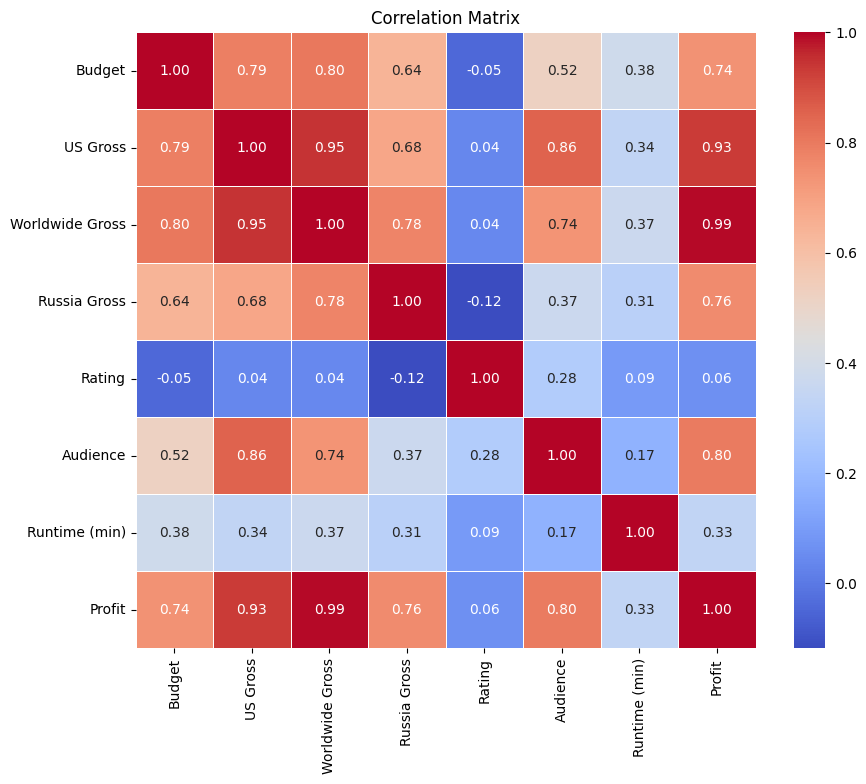

In [13]:
# Selecting numeric columns for correlation analysis
numeric_columns = ['Budget', 'US Gross', 'Worldwide Gross', 'Russia Gross', 'Rating', 'Audience', 'Runtime (min)', 'Profit']
correlation_matrix = movies_df[numeric_columns].corr()

# Visualization of the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### Key insights from obtained heat map:

#### 1. **Budget and Revenue**
   - **Budget vs US Gross**: Correlation **0.79**.
     - Higher budgets strongly correlate with higher US revenue.
   - **Budget vs Worldwide Gross**: Correlation **0.80**.
     - Budget significantly impacts worldwide revenue.
   - **Budget vs Russia Gross**: Correlation **0.64**.
     - Budget also influences Russian revenue, though to a lesser extent.

   **Conclusion**: Budget is a major driver of revenue across all markets.

#### 2. **US, Worldwide, and Russian revenue**
   - **US Gross vs Worldwide Gross**: Correlation **0.95**.
     - Success in the US strongly predicts worldwide success.
   - **US Gross vs Russia Gross**: Correlation **0.68**.
     - US success is moderately linked to success in Russia.
   - **Worldwide Gross vs Russia Gross**: Correlation **0.78**.
     - Worldwide success often accompanies success in Russia.

   **Conclusion**: Revenue across markets is highly interconnected, with US performance being a key indicator.

#### 3. **Rating and other variables**
   - **Rating vs Budget**: Correlation **-0.05**.
     - Budget has almost no impact on ratings.
   - **Rating vs Worldwide Gross**: Correlation **0.04**.
     - Ratings do not significantly influence revenue.
   - **Rating vs Audience**: Correlation **0.28**.
     - Higher-rated films slightly attract more viewers.

   **Conclusion**: Ratings have little to no effect on commercial success. There is a really weak correlation between ratings and other variables. 

#### 4. **Audience and Revenue**
   - **Audience vs US Gross**: Correlation **0.86**.
     - More viewers strongly correlate with higher US revenue.
   - **Audience vs Worldwide Gross**: Correlation **0.74**.
     - More viewers also correlate with higher worldwide revenue.

   **Conclusion**: Audience size is a strong predictor of revenue.

#### 5. **Runtime**
   - **Runtime vs Budget**: Correlation **0.38**.
     - Longer films tend to have higher budgets.
   - **Runtime vs Worldwide Gross**: Correlation **0.37**.
     - Longer films tend to generate higher revenue.

   **Conclusion**: Runtime plays a moderate role in both budget and revenue.

#### 6. **Profit**
   - **Profit vs Budget**: Correlation **0.74**.
     - Higher budgets strongly correlate with higher profits.
   - **Profit vs Worldwide Gross**: Correlation **0.99**.
     - Profit is almost entirely determined by worldwide revenue.
   - **Profit vs US Gross**: Correlation **0.93**.
     - US revenue significantly impacts profit.

   **Conclusion**: Profit is overwhelmingly driven by revenue, particularly worldwide.



### Final takeaways:
1. **Budget is critical**:
   - Higher budgets strongly correlate with higher revenue and profit.

2. **US success predicts global success**:
   - Strong performance in the US is a reliable indicator of worldwide success.

3. **Ratings don’t drive revenue**:
   - Ratings have little to no impact on commercial success.

4. **Audience size matters**:
   - Films with larger audiences tend to generate more revenue.

5. **Runtime influences budget and revenue**:
   - Longer films typically have higher budgets and generate more revenue.

6. **Profit is revenue-driven**:
   - Profit is almost entirely determined by revenue, especially worldwide.

---  

## 7. Top 250 Analysis

### Extracting Top Position
The `Top 250` column contains information about a movie's position in the top 250 list. We extract the numeric position using a regular expression and convert it to an integer for analysis.

### Top Position vs Rating
We create a scatter plot to visualize the relationship between a movie's position in the top 250 and its rating. Key features of the plot:
- **X-axis**: Top position (1 being the highest).
- **Y-axis**: Movie rating.
- The X-axis is inverted so that the top position 1 appears on the left.

#### Insights:
- Higher-rated movies tend to occupy higher positions in the top 250 list.
- There may be some variability, indicating that factors other than rating (e.g., popularity, cultural impact) also influence a movie's position.

### Top Position vs Worldwide Gross
Another scatter plot is created to explore the relationship between a movie's position in the top 250 and its worldwide gross revenue. Key features of the plot:
- **X-axis**: Top position (1 being the highest).
- **Y-axis**: Worldwide gross revenue.
- The X-axis is inverted so that the top position 1 appears on the left.

#### Insights:
- Movies with higher worldwide gross revenue tend to occupy higher positions in the top 250 list.
- However, some movies with lower revenue still achieve high positions, suggesting that financial success is not the only factor influencing a movie's ranking.


<>:4: SyntaxWarning:

invalid escape sequence '\d'

<>:4: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\aldir\AppData\Local\Temp\ipykernel_29572\891153250.py:4: SyntaxWarning:

invalid escape sequence '\d'



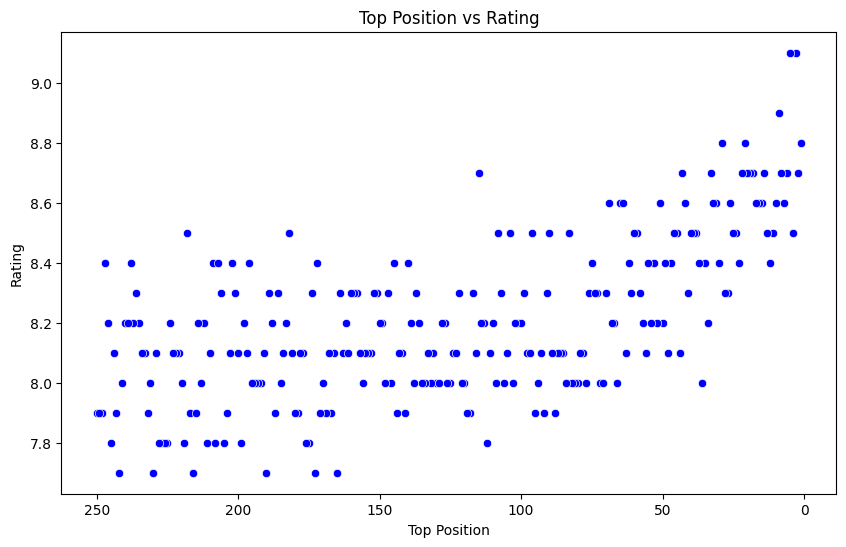

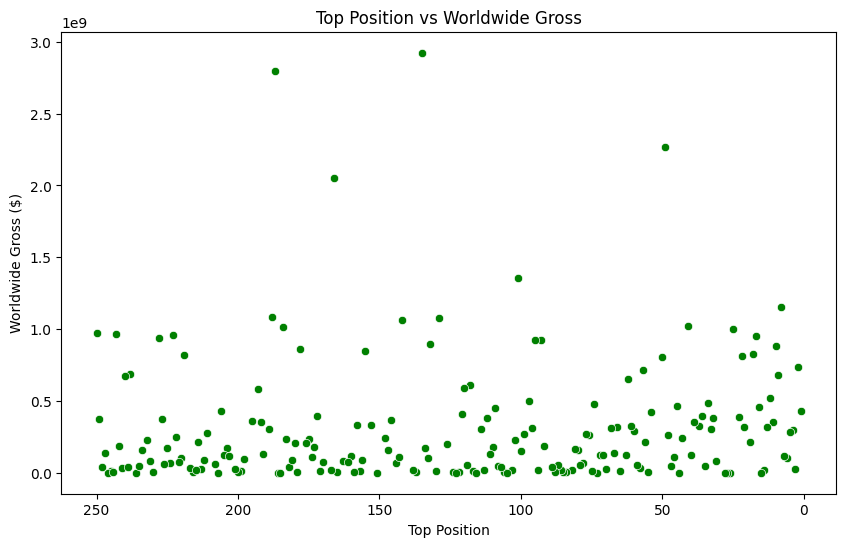

In [18]:
top_250_df = movies_df[movies_df['Top 250'].notna()]

# Extract a top spot from the 'Top 250'column
top_250_df['Top Position'] = top_250_df['Top 250'].str.extract('(\d+)').astype(int)

# Dependence of the place in the top on the rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_250_df['Top Position'], y=top_250_df['Rating'], color='blue')
plt.title('Top Position vs Rating')
plt.xlabel('Top Position')
plt.ylabel('Rating')
plt.gca().invert_xaxis()
plt.show()

# Dependence of a place in the top on fees in the world
plt.figure(figsize=(10, 6))
sns.scatterplot(x=top_250_df['Top Position'], y=top_250_df['Worldwide Gross'], color='green')
plt.title('Top Position vs Worldwide Gross')
plt.xlabel('Top Position')
plt.ylabel('Worldwide Gross ($)')
plt.gca().invert_xaxis()
plt.show()

### Key insights

1. **Top position and rating:** We can see that for Top Position vs Rating Scatter, there is a correlation between rating and the position in the top - It means that the ratings are considered as a criterion for determining the top position of the film. But it isn't only criterion as we can see (in such case, correlation would be strong, each film that has more rating that another one, would have the less value of the position in top).
2. **Top position and worldwide gross:** As we can see, there is no visible relation between worldwide gross and position in the top 250 list. It is confirms suggestion that revenue doesn't have sense in terms of list rating criteria.

---

## 8. Text Analysis of User Reviews

### Preparing Stopwords
We use the `nltk` library to download and load a set of Russian stopwords. Stopwords are common words (e.g., "и", "в", "на") that are often filtered out in text analysis because they do not carry significant meaning.

### Combining All Reviews
The user reviews are stored as lists, where each review contains a username, title, and text. We extract the text from each review and combine all reviews into a single string for analysis.

### Filtering and Counting Words
We split the combined text into individual words and filter out stopwords. The remaining words are counted to determine their frequency. This helps identify the most common words used in user reviews.

In [ ]:
!pip install textblob

In [19]:
from collections import Counter
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

if 'User Reviews' in movies_df.columns:
    all_reviews = ' '.join([review[2] for review in movies_df['User Reviews'].dropna() if isinstance(review, list) and len(review) > 2])

    words = [word for word in all_reviews.split() if word.lower() not in stop_words]
    word_freq = Counter(words)

    top_words = word_freq.most_common(35)
    print("Top 10 most frequent words in reviews:", top_words)

Top 10 most frequent words in reviews: [('это', 645), ('-', 531), ('фильм', 340), ('который', 273), ('–', 262), ('—', 217), ('очень', 216), ('просто', 179), ('фильма', 153), ('Это', 150), ('10', 150), ('всё', 131), ('которые', 126), ('фильме', 117), ('кино', 115), ('то,', 108), ('своей', 108), ('том,', 104), ('Фильм', 102), ('время', 100), ('именно', 99), ('которая', 97), ('лишь', 90), ('также', 80), ('того,', 79), ('является', 73), ('становится', 73), ('история', 71), ('истории', 66), ('её', 63), ('ещё', 63), ('нам', 62), ('герой', 62), ('фильм,', 62), ('хотя', 61)]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aldir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Key Insights from obtained data:

Unfortunately, we haven't been able to get any useful information from this analysis yet - we only have some general words such as 'history', 'films', 'are', 'very' and 'just'. However, this doesn't mean there is no useful information at all. We need to use different techniques, such as morphological modules, to extract information that can help with our observations. This will be done in the next stages of our project development.

---

## 9. Actor Analysis

### Extracting Actor Data
To analyze the performance of actors, we create a list where each entry contains an actor's name, the rating of the movie they appeared in, and the worldwide gross revenue of that movie. This is done by iterating through the dataset and extracting the relevant information for each actor.

### Creating an Actor DataFrame
The list of actor data is converted into a DataFrame for easier manipulation and analysis. This DataFrame includes columns for the actor's name, the average rating of movies they appeared in, the average worldwide gross revenue of those movies, and the number of movies they appeared in.

### Filtering and Ranking Actors
We filter the DataFrame to include only actors who have appeared in at least two movies. This ensures that the analysis focuses on actors with a significant presence in the dataset. Finally, we identify the top 50 actors based on the number of movies they have appeared in.

In [16]:
# Creating a list of all actors and their data
actor_data = []
for index, row in movies_df.iterrows():
    if isinstance(row['Actors'], list):
        for actor in row['Actors']:
            actor_data.append({
                'Actor': actor,
                'Rating': row['Rating'],
                'Worldwide Gross': row['Worldwide Gross']
            })

# Creating a DataFrame from the list
actors_df = pd.DataFrame(actor_data)

# Grouping by actors and calculating average values
actors_summary = actors_df.groupby('Actor').agg({
    'Rating': 'mean',
    'Worldwide Gross': 'mean',
    'Actor': 'count'
}).rename(columns={'Actor': 'Movie Count'}).reset_index()

# Filtering actors who have appeared in several films (for example, at least 2)
actors_summary = actors_summary[actors_summary['Movie Count'] >= 2]
top_actors = actors_summary.nlargest(50, 'Movie Count')  # Top 50 by number of movies

**Note**: we need to install plotly for our next interactive visualization: 

In [ ]:
!pip install plotly

## Visualizing Actor Performance

### Interactive Scatter Plot with Plotly
To better understand the relationship between actors, their movie ratings, and their financial success, we create an interactive scatter plot using `plotly.express`. The plot includes:
- **X-axis**: Average movie rating.
- **Y-axis**: Actor names.
- **Size of bubbles**: Number of movies the actor has appeared in (`Movie Count`).
- **Color of bubbles**: Average worldwide gross revenue of the actor's movies.

Hovering over a bubble displays additional details, such as the actor's name, average rating, and average worldwide gross.

### Insights
- The plot helps identify actors who consistently appear in highly rated movies.
- It also highlights actors whose movies generate high worldwide gross revenue.
- The size of the bubbles indicates how prolific each actor is in terms of the number of movies they have appeared in.

In [17]:
import plotly.express as px

fig = px.scatter(
    top_actors,
    x='Rating',
    y='Actor',
    size='Movie Count',
    color='Worldwide Gross',
    hover_name='Actor',
    size_max=60,
    title='Actors by Average Movie Rating, Movie Count, and Worldwide Gross'
)
fig.show()

# Summary for Exploratory Data Analysis

Here is summary of the data analysis:

## Some significant coucomes (recap):

  - **Genres:** The most common genres: "drama", "comedy", "crime" - dominate the dataset - especially the "drama" (драма) genre. It shows us audience preferences for not only high-rated film genres, but also film genres in general (patterns).
  - **Correlations:**
    1. **Budget is critical**: Higher budgets strongly correlate with higher revenue and profit.

    2. **US success predicts global success**: Strong performance in the US is a reliable indicator of worldwide success.

    3. **Ratings don’t drive revenue**: Ratings have little to no impact on commercial success.

    4. **Audience size matters**: Films with larger audiences tend to generate more revenue.

    5. **Runtime influences budget and revenue**: Longer films typically have higher budgets and generate more revenue.

    6. **Profit is revenue-driven**: Profit is almost entirely determined by revenue, especially worldwide.
       
  - **Budget of films vs Revenue.:** There is a clear positive trend (for high-rating films, obviously): as the budget increases, the worldwide gross revenue tends to increase as well. This suggests that higher-budget films generally generate higher revenue.
  - **Position in top 250 list and rating relation:** There is a correlation between rating and the position in the top - It means that the ratings are considered as a criterion for determining the top position of the film.
  - **Relation between films and period of history:** on the example of year-film distribution.

## Future work:

  - Missing data analysis shows that there is a problem with missing values, even in features that are significant for the analysis. (such as `Budget` and `Gross` features), so we need to solve this issue using one of the preprocessing techniques.
  - There is an issue with understanding the data about reviews. We need to use more complex libraries to correctly interpret the textual data (for example, using keywords).
  - We need to consider all the visualizations more explicitly and add more [visualizations] to find other "hidden" dependencies and relations for the better understanding the data.